<a href="https://colab.research.google.com/github/simoncardenas2002/Redes-Neuronales/blob/master/red_con_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

 ### Primero se crea el conjunto de datos 

In [2]:
N=1000
gaussian_quantiles=make_gaussian_quantiles(mean=None,cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)
X,Y = gaussian_quantiles

In [3]:
X.shape

(1000, 2)

In [4]:
Y=Y[:,np.newaxis]

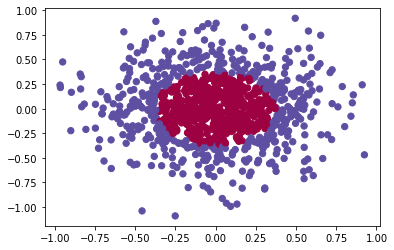

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0],s=40,cmap=plt.cm.Spectral)

In [50]:
# Agregaremos las funciones de activación
def sigmoid(x,derivate=False):
  if derivate:
    return np.exp(-x)/((np.exp(-x)+1)**2)
  else:
    return 1/(1+np.exp(-x))

def relu(x,derivate=True):
  if derivate:
    x[x<=0]=0
    x[x>0]=1
    return x
  else:
    return np.maximum(0,x)

In [7]:
# Agregamos la funcion de perdida

def mse(y,y_hat,derivate=False):
  if derivate:
    return(y_hat - y)
  else:
    return np.mean((y_hat-y)**2)


### Crearemos la estructura de la red

In [49]:
def inicializar_parameters_deep(layers_dim):
  parameters={}
  L=len(layers_dim)
  for l in range(0,L-1):
    parameters["W"+str(l+1)]=(np.random.rand(layers_dim[l],layers_dim[l+1])*2)-1
    parameters["b"+str(l+1)]=(np.random.rand(1,layers_dim[l+1])*2)-1
  return parameters

    

In [9]:
layer_dims=[2,4,8,1]
params=inicializar_parameters_deep(layer_dims)

In [11]:
params["W1"].shape

(2, 4)

In [10]:
X.shape

(1000, 2)

In [12]:
#Haremos producto punto 
np.matmul(X,params["W1"])

array([[ 0.19524264,  0.06879651,  0.11246763,  0.16355076],
       [-0.19135998, -0.0033987 , -0.03037173, -0.06443919],
       [ 0.0191945 ,  0.0328378 ,  0.04357734,  0.05511485],
       ...,
       [ 0.19054649, -0.00281325,  0.02251296,  0.05488696],
       [ 0.14304132,  0.03491175,  0.06307697,  0.09663131],
       [-0.26890657, -0.0500994 , -0.09920797, -0.15840637]])

In [13]:
np.matmul(X,params["W1"]).shape

(1000, 4)

In [14]:
params["b1"].shape


(1, 4)

In [48]:
def train(x_data,lr,params,training=True):
  
  params
  ### Forward

  #Input layer
  params["A0"] =x_data
  #First hidden layer
  params["Z1"]=np.matmul(params["A0"],params["W1"])+params["b1"]
  params["A1"]=relu(params["Z1"])
  #Second hidden layer
  params["Z2"]=np.matmul(params["A1"],params["W2"])+params["b2"]
  params["A2"]=relu(params["Z2"])
  #Output layer
  params["Z3"]=np.matmul(params["A2"],params["W3"])+params["b3"]
  params["A3"]=sigmoid(params["Z3"])

  output=params["A3"]

  # Backpropagation
  if training:

    params["dZ3"]=mse(Y,output,True)*sigmoid(params["A3"],True)
    params["dW3"]=np.matmul(params["A2"].T,params["dZ3"])

    params["dZ2"]=np.matmul(params["dZ3"],params["W3"].T)*relu(params["A2"],True)
    params["dW2"]=np.matmul(params["A1"].T,params["dZ2"])

    params["dZ1"]=np.matmul(params["dZ2"],params["W2"].T)*relu(params["A1"],True)
    params["dW1"]=np.matmul(params["A0"].T,params["dZ1"])

    ## Gradient decent
    params["W3"]=params["W3"]-params["dW3"]*lr
    params["b3"]=params["b3"]-(np.mean(params["dW3"],axis=0,keepdims=True))*lr

    params["W2"]=params["W2"]-params["dW2"]*lr
    params["b2"]=params["b2"]-(np.mean(params["dW2"],axis=0,keepdims=True))*lr

    params["W1"]=params["W1"]-params["dW1"]*lr
    params["b1"]=params["b1"]-(np.mean(params["dW1"],axis=0,keepdims=True))*lr
  return output


### Entrenamiento del modelo

In [ ]:
layer_dims=[2,4,8,1]
params=inicializar_parameters_deep(layer_dims)
errors=[]
for i in range(60000):
  output=train(X,0.00001,params)
  if i % 25 ==0:
    print(mse(Y,output))
    errors.append(mse(Y,output))


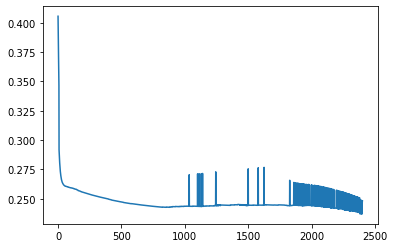

In [44]:
plt.plot(errors)

Ahora crearemos la data de prueba

In [45]:
data_test=(np.random.rand(1000,2)*2)-1
y=train(data_test,0.0001,params,training=False)

In [46]:
y=np.where(y>=0.5,1,0)

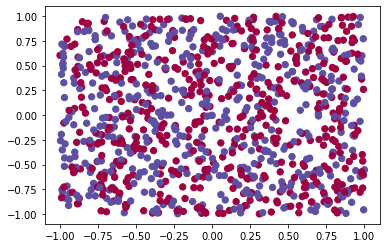

In [47]:
plt.scatter(data_test[:,0],data_test[:,1],c=Y[:,0],s=40,cmap=plt.cm.Spectral)